## Computer Jazz

Using a Recurrent Neural Network to generate music.

Limitations:

- Running it on my own computer (M1 mac mini -> no cuda, but access to GPU using mps)
    But I did use google colab to optimize and test. 
- insufficient/ inconsistent training data (different instruments/ sometimes a
drums track is included, only ±450 midi images with limited length)
---

I got inspired by recent AI versions of Frank Sinatra singing popular songs (pretty confincing). And it sent me down a Youtube loophole looking for methods of generating
AI music. 

Anyhow, there was this video of a guy trying three different approaches
to generate computer composed jazz music. 
https://www.youtube.com/watch?v=nA3YOFUCn4U


The way he does it is by converting MIDI files to images, and using various
neural networks to reconstruct these images. The best for this purpose was Pixel CNN (though it is a matter of taste, I guess a lot will pass for music).
Pixel CNN in contrast with a general Convolutional neural network generates pixel by pixel based on the previous pixels (by masking the rest) instead of generating a whole picture at once. And this may be exactly what you want in the creation of music:
based on the tones that have been played in sequence in the test data, what would be the best prediction for the next note to play, or maybe a pause, or a pitch shift?

Link to the paper on Pixel CNN:
https://arxiv.org/pdf/1701.05517.pdf

Pytorch implementation of Pixel CNN that I am using (I tried to build it from scratch first but could not get it to work right. So I grabbed and modified this one.):
https://github.com/singh-hrituraj/PixelCNN-Pytorch


I found these MIDI's on kaggle: https://www.kaggle.com/datasets/saikayala/jazz-ml-ready-midi

And found out that these aren't exactly jazz numbers. :(
So the goal is more the creation of music instead of Jazz.

The code used to convert the MIDI's to images and back I found at (and slightly modified it): https://github.com/mathigatti/midi2img/

In the MIDI to image code different instruments or when the length of pixels is exceeded different images are saved in separate files.
In the mentioned Youtube video a three channel image is used (rgb) to store more data in one image of one instrument getting three times as much information in one image. However I think it would be more interesting to use the different channels for different instruments. 


First I generated all rgb images.
Example, 634-5789.midi becomes:

<img src="634-5789.png" alt=" midi" style="width: 30%; height: 30%;">



Because of the way the pixels are constructed (top to bottom) it is best to rotate the images 90 degrees
In that way the model takes in account pixels generated in the same space.







In [57]:
import os
from PIL import Image

import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

from PixelCNN.model import PixelCNN

In [58]:
#hyperparams
batch_size = 16
num_epochs = 200
learning_rate = 0.01
num_layers = 6
num_filters = 118




In [59]:
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

device

device(type='mps')

In [60]:
train_path = "/Users/timniemeijer/DATA/Jazz_midi_images/"

dir_name = "train_dataset_dir"

pictures = os.listdir(os.path.join(train_path,dir_name))


example_paths = [os.path.join(train_path, dir_name, picture) for picture in pictures if picture != '.DS_Store']

images = [Image.open(example_path) for example_path in example_paths]

np_ims = [np.rot90(np.array(image.getdata()).reshape((106,100,3))).astype('float32') for image in images]



In [61]:
# Model test

# Set random seed for reproducibility
torch.manual_seed(42)

# Create the PixelCNN model
model = PixelCNN(no_layers=num_layers, channels=num_filters).to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#input data
input_data = torch.tensor(np_ims)
input_data = input_data.permute(0, 3, 1, 2).to(device)
print(input_data.shape)

# Create a data loader
dataloader = DataLoader(input_data, batch_size=batch_size, shuffle=True)


torch.Size([472, 3, 100, 106])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


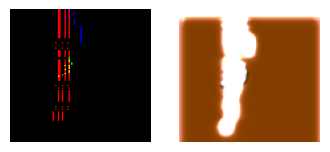

Epoch [1/200], Loss: 742.498718
Epoch [2/200], Loss: 675.710144
Epoch [3/200], Loss: 459.771057
Epoch [4/200], Loss: 424.364349
Epoch [5/200], Loss: 374.589722
Epoch [6/200], Loss: 367.717224
Epoch [7/200], Loss: 348.329193
Epoch [8/200], Loss: 302.696350
Epoch [9/200], Loss: 300.826111
Epoch [10/200], Loss: 281.168640


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


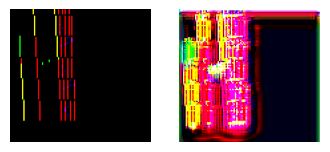

Epoch [11/200], Loss: 246.063889
Epoch [12/200], Loss: 198.834457
Epoch [13/200], Loss: 210.040802
Epoch [14/200], Loss: 265.773010
Epoch [15/200], Loss: 238.979797
Epoch [16/200], Loss: 211.820648
Epoch [17/200], Loss: 121.146431
Epoch [18/200], Loss: 205.376282
Epoch [19/200], Loss: 259.546936
Epoch [20/200], Loss: 206.398636


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


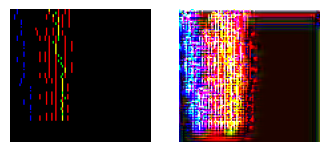

Epoch [21/200], Loss: 230.678360
Epoch [22/200], Loss: 178.216751
Epoch [23/200], Loss: 138.199188
Epoch [24/200], Loss: 241.786804
Epoch [25/200], Loss: 228.996323
Epoch [26/200], Loss: 250.856400
Epoch [27/200], Loss: 195.816147
Epoch [28/200], Loss: 185.875214
Epoch [29/200], Loss: 220.874802
Epoch [30/200], Loss: 187.623383


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


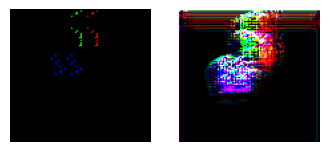

Epoch [31/200], Loss: 170.145279
Epoch [32/200], Loss: 243.055283
Epoch [33/200], Loss: 200.306091
Epoch [34/200], Loss: 167.136627
Epoch [35/200], Loss: 158.413040
Epoch [36/200], Loss: 172.340607
Epoch [37/200], Loss: 155.642807
Epoch [38/200], Loss: 178.321823
Epoch [39/200], Loss: 179.324493
Epoch [40/200], Loss: 191.688705


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


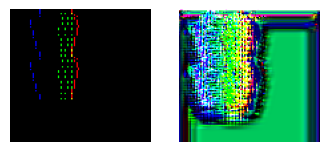

Epoch [41/200], Loss: 146.301971
Epoch [42/200], Loss: 192.690857
Epoch [43/200], Loss: 139.603882
Epoch [44/200], Loss: 144.275497
Epoch [45/200], Loss: 113.322891
Epoch [46/200], Loss: 172.746216
Epoch [47/200], Loss: 131.862457
Epoch [48/200], Loss: 140.187485
Epoch [49/200], Loss: 160.246094
Epoch [50/200], Loss: 113.518501


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


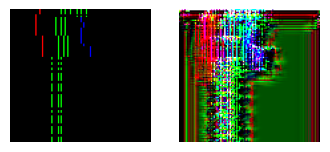

Epoch [51/200], Loss: 128.193497
Epoch [52/200], Loss: 140.904465
Epoch [53/200], Loss: 188.355591
Epoch [54/200], Loss: 114.429619
Epoch [55/200], Loss: 118.684052
Epoch [56/200], Loss: 126.114571
Epoch [57/200], Loss: 108.047752
Epoch [58/200], Loss: 117.864883
Epoch [59/200], Loss: 120.622131
Epoch [60/200], Loss: 109.409973


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


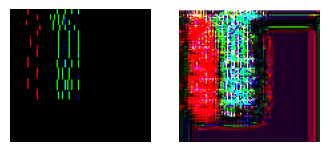

Epoch [61/200], Loss: 129.758011
Epoch [62/200], Loss: 120.973885
Epoch [63/200], Loss: 130.233337
Epoch [64/200], Loss: 153.031082
Epoch [65/200], Loss: 95.429588
Epoch [66/200], Loss: 163.767975
Epoch [67/200], Loss: 83.228676
Epoch [68/200], Loss: 115.553307
Epoch [69/200], Loss: 112.116936
Epoch [70/200], Loss: 115.602966


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


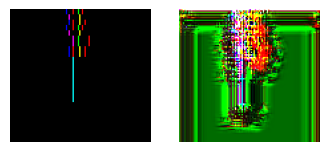

Epoch [71/200], Loss: 102.971420
Epoch [72/200], Loss: 85.400009
Epoch [73/200], Loss: 123.775421
Epoch [74/200], Loss: 85.984909
Epoch [75/200], Loss: 96.087990
Epoch [76/200], Loss: 93.985367
Epoch [77/200], Loss: 98.803482
Epoch [78/200], Loss: 93.331573
Epoch [79/200], Loss: 95.887383
Epoch [80/200], Loss: 87.653831


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


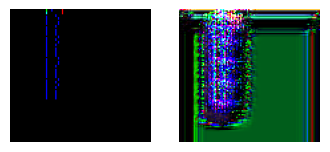

Epoch [81/200], Loss: 69.212845
Epoch [82/200], Loss: 90.523354
Epoch [83/200], Loss: 74.952103
Epoch [84/200], Loss: 111.514702
Epoch [85/200], Loss: 79.684380
Epoch [86/200], Loss: 73.865738
Epoch [87/200], Loss: 111.576164
Epoch [88/200], Loss: 93.187798
Epoch [89/200], Loss: 82.281189
Epoch [90/200], Loss: 83.636665


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


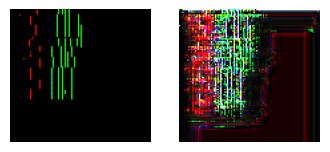

Epoch [91/200], Loss: 83.862823
Epoch [92/200], Loss: 86.377640
Epoch [93/200], Loss: 84.898392
Epoch [94/200], Loss: 80.466591
Epoch [95/200], Loss: 68.296776
Epoch [96/200], Loss: 86.055611
Epoch [97/200], Loss: 79.399147
Epoch [98/200], Loss: 81.694244
Epoch [99/200], Loss: 87.367966
Epoch [100/200], Loss: 57.748070


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


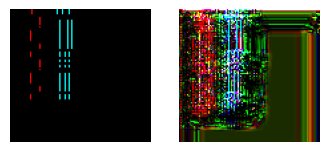

Epoch [101/200], Loss: 69.117653
Epoch [102/200], Loss: 79.962967
Epoch [103/200], Loss: 76.480888
Epoch [104/200], Loss: 69.432076
Epoch [105/200], Loss: 82.261047
Epoch [106/200], Loss: 70.205727
Epoch [107/200], Loss: 90.209206
Epoch [108/200], Loss: 65.867584
Epoch [109/200], Loss: 66.909744
Epoch [110/200], Loss: 67.461929


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


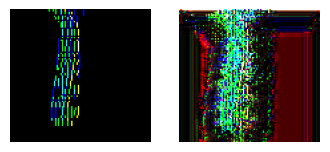

Epoch [111/200], Loss: 81.350754
Epoch [112/200], Loss: 65.675415
Epoch [113/200], Loss: 59.376804
Epoch [114/200], Loss: 61.268242
Epoch [115/200], Loss: 48.562893
Epoch [116/200], Loss: 77.588181
Epoch [117/200], Loss: 55.345028
Epoch [118/200], Loss: 73.141724
Epoch [119/200], Loss: 67.803055
Epoch [120/200], Loss: 55.146362


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


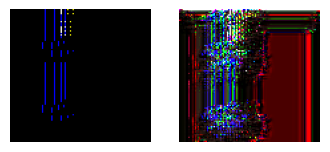

Epoch [121/200], Loss: 64.642670
Epoch [122/200], Loss: 48.128933
Epoch [123/200], Loss: 75.180244
Epoch [124/200], Loss: 62.554165
Epoch [125/200], Loss: 58.584217
Epoch [126/200], Loss: 52.029762
Epoch [127/200], Loss: 51.806919
Epoch [128/200], Loss: 40.134430
Epoch [129/200], Loss: 58.932659
Epoch [130/200], Loss: 44.335705


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


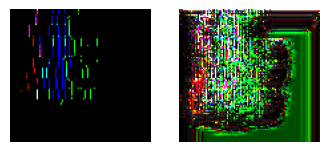

Epoch [131/200], Loss: 56.974415
Epoch [132/200], Loss: 53.885242
Epoch [133/200], Loss: 49.152695
Epoch [134/200], Loss: 51.039467
Epoch [135/200], Loss: 55.280170
Epoch [136/200], Loss: 49.339157
Epoch [137/200], Loss: 48.457947
Epoch [138/200], Loss: 52.637169
Epoch [139/200], Loss: 47.698811
Epoch [140/200], Loss: 53.629230


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


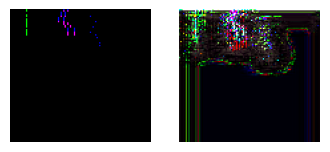

Epoch [141/200], Loss: 38.042622
Epoch [142/200], Loss: 41.715889
Epoch [143/200], Loss: 49.629021
Epoch [144/200], Loss: 50.227650
Epoch [145/200], Loss: 42.511986
Epoch [146/200], Loss: 51.307743
Epoch [147/200], Loss: 38.270073
Epoch [148/200], Loss: 41.212753
Epoch [149/200], Loss: 37.575668
Epoch [150/200], Loss: 48.036545


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


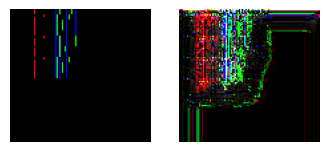

Epoch [151/200], Loss: 44.088860
Epoch [152/200], Loss: 55.459454
Epoch [153/200], Loss: 47.699459
Epoch [154/200], Loss: 40.354992
Epoch [155/200], Loss: 37.649067
Epoch [156/200], Loss: 42.399441
Epoch [157/200], Loss: 45.743900
Epoch [158/200], Loss: 35.556389
Epoch [159/200], Loss: 44.931870
Epoch [160/200], Loss: 40.662964


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


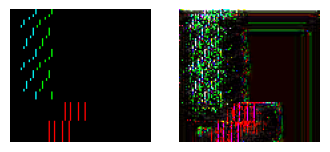

Epoch [161/200], Loss: 32.497555
Epoch [162/200], Loss: 35.277012
Epoch [163/200], Loss: 32.442516
Epoch [164/200], Loss: 42.200546
Epoch [165/200], Loss: 39.756340
Epoch [166/200], Loss: 34.425808
Epoch [167/200], Loss: 35.196022
Epoch [168/200], Loss: 35.933876
Epoch [169/200], Loss: 33.268490
Epoch [170/200], Loss: 32.901089


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


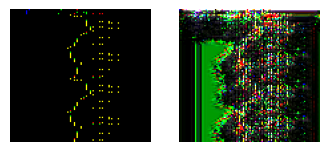

Epoch [171/200], Loss: 33.474716
Epoch [172/200], Loss: 36.179237
Epoch [173/200], Loss: 38.414791
Epoch [174/200], Loss: 35.110107
Epoch [175/200], Loss: 36.399364
Epoch [176/200], Loss: 40.455700
Epoch [177/200], Loss: 39.717560
Epoch [178/200], Loss: 34.141296
Epoch [179/200], Loss: 43.252365
Epoch [180/200], Loss: 40.729866


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


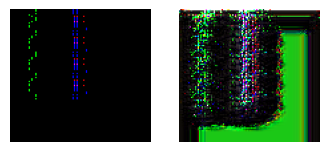

Epoch [181/200], Loss: 41.339111
Epoch [182/200], Loss: 37.008514
Epoch [183/200], Loss: 38.448826
Epoch [184/200], Loss: 38.239113
Epoch [185/200], Loss: 37.994801
Epoch [186/200], Loss: 34.033844
Epoch [187/200], Loss: 32.797337
Epoch [188/200], Loss: 33.454750
Epoch [189/200], Loss: 33.234940
Epoch [190/200], Loss: 31.851395


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


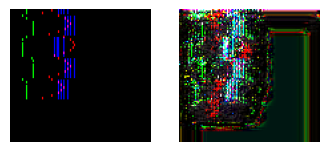

Epoch [191/200], Loss: 28.330732
Epoch [192/200], Loss: 30.678049
Epoch [193/200], Loss: 33.409096
Epoch [194/200], Loss: 33.490437
Epoch [195/200], Loss: 36.386681
Epoch [196/200], Loss: 36.822987
Epoch [197/200], Loss: 36.982285
Epoch [198/200], Loss: 41.953255
Epoch [199/200], Loss: 31.679533
Epoch [200/200], Loss: 35.495537


In [62]:
# Train the model
model.train()
for epoch in range(num_epochs):
    for images in dataloader:
        # Forward pass
        outputs = model(images)
        # Compute the loss (reconstruction loss)
        loss = criterion(outputs, images)
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 1:
        fig, ax = plt.subplots(1,2, figsize=(4,8))
        ax[0].imshow(images[0].detach().permute(1,2,0).cpu().numpy())
        ax[1].imshow(outputs[0].detach().permute(1,2,0).cpu().numpy())
        ax[0].axis('off')
        ax[1].axis('off')
        plt.show()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")

In [63]:
# Set the model to evaluation mode
model.eval()

# Specify the image size and number of channels
image_size = (100, 106)
num_channels = 3

# Generate a random seed image
seed_image = torch.zeros(1, num_channels, *image_size).to(device)

# Generate a single pixel of full intensity at a random position in the first row
with torch.no_grad():
    # First row has a random pixel
    random_col = torch.randint(0, image_size[1], (1,))
    # start with one random red pixel
    mask = torch.zeros(1, 1, *image_size).to(device)
    mask[:, 0, 0, random_col] = 255.0
    seed_image = seed_image + mask

    # Generate the remaining pixels sequentially
    for i in range(1, image_size[0]):
        for j in range(image_size[1]):
            # Condition the model on the previously generated pixels
            output = model(seed_image)
            signal = output[:, :, i, j].float()
            # threshold of about 10%. tried using chances first but I guess
            # the model had to be trained with pixels in the range 0-1
            signal = torch.where(signal > 15.0, torch.tensor(255.0, device=device), torch.tensor(0.0, device=device))
            seed_image[:, :, i, j] = signal


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(100, 106, 3)


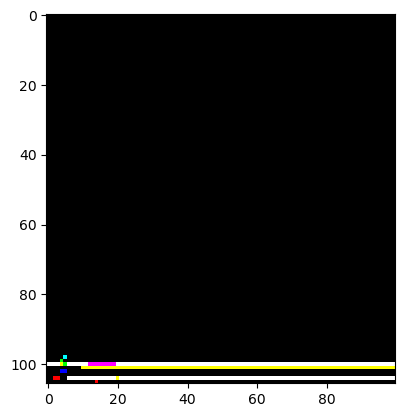

In [64]:
# Convert the seed image tensor to a numpy array
generated_image = seed_image.squeeze().permute(1,2,0).cpu().numpy()

# Display the generated image
print(generated_image.shape)

plt.imshow(np.rot90(generated_image, 1))
#plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


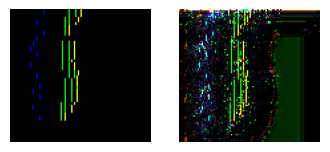

Epoch [301/400], Loss: 29.095860
Epoch [302/400], Loss: 31.955465
Epoch [303/400], Loss: 31.359201
Epoch [304/400], Loss: 32.928577
Epoch [305/400], Loss: 37.545628
Epoch [306/400], Loss: 38.476368
Epoch [307/400], Loss: 34.776436
Epoch [308/400], Loss: 30.094469
Epoch [309/400], Loss: 28.209599
Epoch [310/400], Loss: 30.425388


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


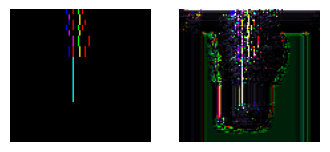

Epoch [311/400], Loss: 24.408504
Epoch [312/400], Loss: 21.514885
Epoch [313/400], Loss: 26.149597
Epoch [314/400], Loss: 18.759655
Epoch [315/400], Loss: 18.833820
Epoch [316/400], Loss: 19.265730
Epoch [317/400], Loss: 22.227440
Epoch [318/400], Loss: 20.090153
Epoch [319/400], Loss: 20.257418
Epoch [320/400], Loss: 22.311749


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


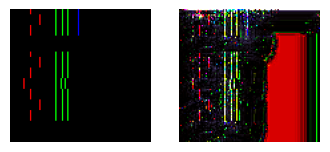

Epoch [321/400], Loss: 27.961115
Epoch [322/400], Loss: 22.869455
Epoch [323/400], Loss: 21.601261
Epoch [324/400], Loss: 20.256914
Epoch [325/400], Loss: 21.510094
Epoch [326/400], Loss: 22.335655
Epoch [327/400], Loss: 20.575871
Epoch [328/400], Loss: 19.339161
Epoch [329/400], Loss: 22.119909
Epoch [330/400], Loss: 15.595709


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


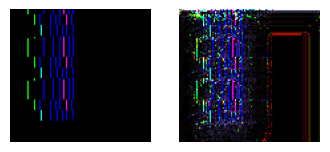

Epoch [331/400], Loss: 16.608852
Epoch [332/400], Loss: 21.115349
Epoch [333/400], Loss: 18.325069
Epoch [334/400], Loss: 23.074842
Epoch [335/400], Loss: 18.775841
Epoch [336/400], Loss: 22.168438
Epoch [337/400], Loss: 16.808210
Epoch [338/400], Loss: 21.419720
Epoch [339/400], Loss: 23.205341
Epoch [340/400], Loss: 22.876989


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


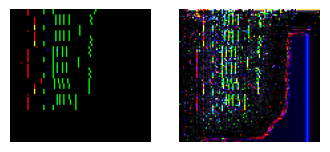

Epoch [341/400], Loss: 23.390757
Epoch [342/400], Loss: 19.131840
Epoch [343/400], Loss: 18.220888
Epoch [344/400], Loss: 17.292856
Epoch [345/400], Loss: 21.374117
Epoch [346/400], Loss: 23.439138
Epoch [347/400], Loss: 22.655941
Epoch [348/400], Loss: 20.001802
Epoch [349/400], Loss: 20.777899
Epoch [350/400], Loss: 23.779444


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


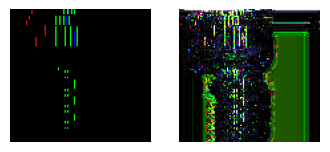

Epoch [351/400], Loss: 17.269676
Epoch [352/400], Loss: 19.775749
Epoch [353/400], Loss: 20.376427
Epoch [354/400], Loss: 24.271706
Epoch [355/400], Loss: 23.834236
Epoch [356/400], Loss: 22.210447
Epoch [357/400], Loss: 21.382496
Epoch [358/400], Loss: 20.139307
Epoch [359/400], Loss: 24.530104
Epoch [360/400], Loss: 20.612047


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


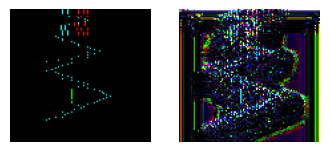

Epoch [361/400], Loss: 29.063238
Epoch [362/400], Loss: 38.543812
Epoch [363/400], Loss: 59.268925
Epoch [364/400], Loss: 46.206886
Epoch [365/400], Loss: 29.629015
Epoch [366/400], Loss: 29.698151
Epoch [367/400], Loss: 22.242065
Epoch [368/400], Loss: 19.349533
Epoch [369/400], Loss: 18.593534
Epoch [370/400], Loss: 20.880077


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


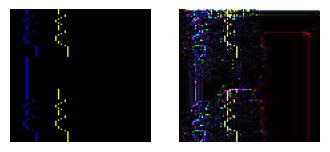

Epoch [371/400], Loss: 21.708069
Epoch [372/400], Loss: 19.742281
Epoch [373/400], Loss: 16.679214
Epoch [374/400], Loss: 21.862831
Epoch [375/400], Loss: 18.645412
Epoch [376/400], Loss: 22.084362
Epoch [377/400], Loss: 20.409708
Epoch [378/400], Loss: 16.657476
Epoch [379/400], Loss: 18.933573
Epoch [380/400], Loss: 17.359549


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


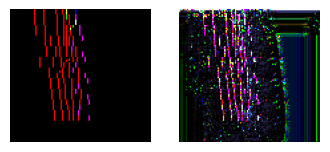

Epoch [381/400], Loss: 15.714895
Epoch [382/400], Loss: 17.256790
Epoch [383/400], Loss: 23.105696
Epoch [384/400], Loss: 15.551649
Epoch [385/400], Loss: 16.891464
Epoch [386/400], Loss: 16.452740
Epoch [387/400], Loss: 19.679264
Epoch [388/400], Loss: 19.557598
Epoch [389/400], Loss: 20.658489
Epoch [390/400], Loss: 13.828485


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


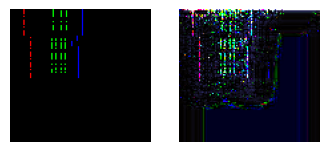

Epoch [391/400], Loss: 18.507769
Epoch [392/400], Loss: 15.533072
Epoch [393/400], Loss: 19.296520
Epoch [394/400], Loss: 15.362392
Epoch [395/400], Loss: 17.602448
Epoch [396/400], Loss: 17.672554
Epoch [397/400], Loss: 20.863712
Epoch [398/400], Loss: 21.722012
Epoch [399/400], Loss: 18.222725
Epoch [400/400], Loss: 16.978609


In [73]:
#train the model some more.
# update, and some more (100 extra + another 100 extra)

model.train()
for epoch in range(100):
    for images in dataloader:
        # Forward pass
        outputs = model(images)
        # Compute the loss (reconstruction loss)
        loss = criterion(outputs, images)
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 1:
        fig, ax = plt.subplots(1,2, figsize=(4,8))
        ax[0].imshow(images[0].detach().permute(1,2,0).cpu().numpy())
        ax[1].imshow(outputs[0].detach().permute(1,2,0).cpu().numpy())
        ax[0].axis('off')
        ax[1].axis('off')
        plt.show()
    print(f"Epoch [{epoch+301}/{num_epochs+200}], Loss: {loss.item():.6f}")

In [86]:
# Set the model to evaluation mode
model.eval()

# Specify the image size and number of channels
image_size = (100, 106)
num_channels = 3

# Generate a random seed image
seed_image = torch.zeros(1, num_channels, *image_size).to(device)

# Generate a single pixel of full intensity at a random position in the first row
with torch.no_grad():
    # First row has a random pixel
    random_col = torch.randint(40, 80, (1,))
    # start with one random red pixel
    mask = torch.zeros(1, 1, *image_size).to(device)
    mask[:, 0, 0, random_col] = 255.0
    seed_image = seed_image + mask

    # Generate the remaining pixels sequentially
    for i in range(1, image_size[0]):
        for j in range(image_size[1]):
            # Condition the model on the previously generated pixels
            output = model(seed_image)
            signal = output[:, :, i, j].float()
            # threshold of about 10%. tried using chances first but I guess
            # the model had to be trained with pixels in the range 0-1
            signal = torch.where(signal > 5.0, torch.tensor(255.0, device=device), torch.tensor(0.0, device=device))
            seed_image[:, :, i, j] = signal


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(100, 106, 3)


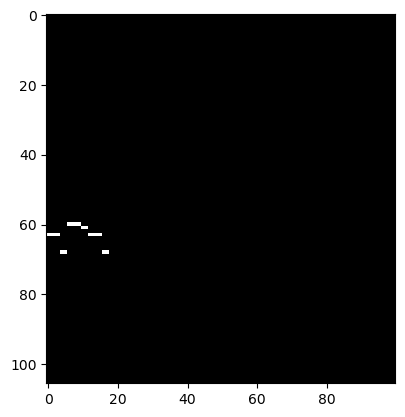

In [ ]:
# Convert the seed image tensor to a numpy array
generated_image = seed_image.squeeze().permute(1,2,0).cpu().numpy()

# Display the generated image
print(generated_image.shape)

plt.imshow(np.rot90(generated_image, 1))
#plt.axis('off')
plt.show()

In [79]:
from imageio import imwrite

#rotate back 
rot_img = np.rot90(generated_image)

imwrite('im_test.png',rot_img.astype(np.uint8))